In [184]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
!pip install fastparquet


In [185]:
data = pd.read_parquet('../../data/basic_preproc_recipes.parquet')

In [186]:
data_recipes_numeric = data_recipes.drop(columns=['steps', 'description', 'ingredients', 'tags', 'nutrition', 'name', 'submitted'])

In [187]:
data_recipes_numeric

,id,minutes,contributor_id,n_steps,n_ingredients
0,137739,55,47892,11,7
1,31490,30,26278,9,6
2,112140,130,196586,6,13
3,59389,45,68585,11,11
4,44061,190,41706,5,8
...,...,...,...,...,...
231632,486161,60,227978,7,22
231633,493372,5,1500678,1,13
231634,308080,40,37779,7,8
231635,298512,29,506822,9,10


In [188]:
data_recipes_numeric['minutes'] = data_recipes_numeric['minutes'].clip(lower =5 ,upper=130)
data_recipes_numeric.sort_values('minutes', ascending=False)

,id,minutes,contributor_id,n_steps,n_ingredients
173731,137137,130,163112,16,11
189396,343631,130,143318,8,9
189397,32639,130,37779,3,9
125609,154473,130,98812,5,7
125608,176661,130,199848,5,13
...,...,...,...,...,...
204270,229732,5,293410,6,8
204268,110870,5,91392,6,3
204263,375930,5,1172344,1,4
83521,244604,5,283251,5,10


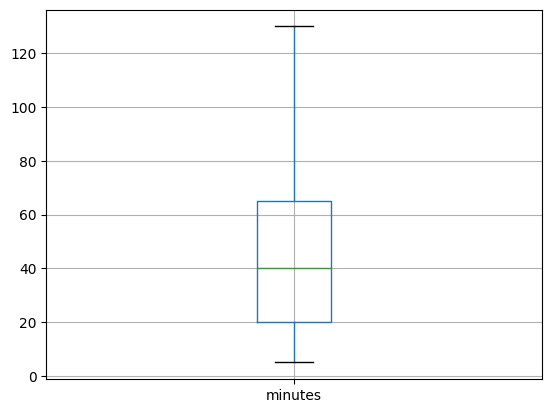

In [189]:
data_recipes_numeric[['minutes']].boxplot();
plt.show()

In [190]:
data_recipes_numeric.drop(data_recipes_numeric[data_recipes_numeric.n_steps == 0].index, inplace=True)
data_recipes_numeric.sort_values('n_steps', ascending=False)

,id,minutes,contributor_id,n_steps,n_ingredients
78633,158120,130,182358,145,8
51528,192468,130,232669,113,24
51532,156874,130,10033,110,13
1627,65007,130,87300,108,24
70088,356724,130,467583,100,19
...,...,...,...,...,...
158177,40655,10,1533,1,8
187872,312212,5,422893,1,4
30898,385448,5,285039,1,5
211965,336337,10,89831,1,6


In [191]:
data_recipes_numeric['n_steps'] = data_recipes_numeric['n_steps'].clip(upper=40)
data_recipes_numeric

,id,minutes,contributor_id,n_steps,n_ingredients
0,137739,55,47892,11,7
1,31490,30,26278,9,6
2,112140,130,196586,6,13
3,59389,45,68585,11,11
4,44061,130,41706,5,8
...,...,...,...,...,...
231632,486161,60,227978,7,22
231633,493372,5,1500678,1,13
231634,308080,40,37779,7,8
231635,298512,29,506822,9,10


In [192]:
data_recipes_numeric.sort_values('n_ingredients', ascending=False)

,id,minutes,contributor_id,n_steps,n_ingredients
2162,3748,80,1535,12,43
230245,234840,70,377070,39,40
139659,258192,130,546010,39,40
116744,113677,130,128473,9,39
18352,248707,55,305531,16,38
...,...,...,...,...,...
103771,134711,10,193499,4,1
148440,431072,5,593927,4,1
114835,250967,5,47892,2,1
166112,40247,20,52448,8,1


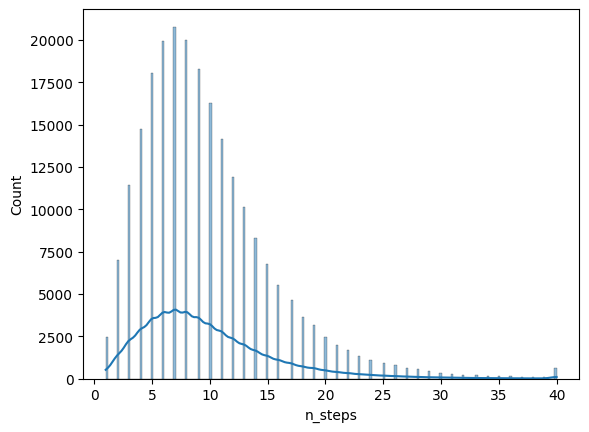

In [193]:
sns.histplot(data_recipes_numeric['n_steps'], bins=200,kde = True);
plt.show()

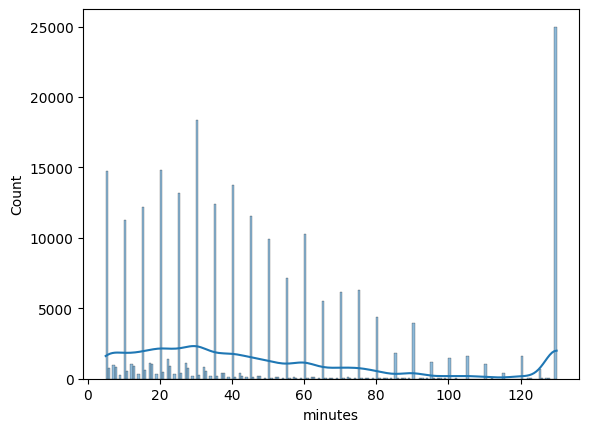

In [194]:
sns.histplot(data_recipes_numeric['minutes'], bins=200,kde = True);
plt.show()

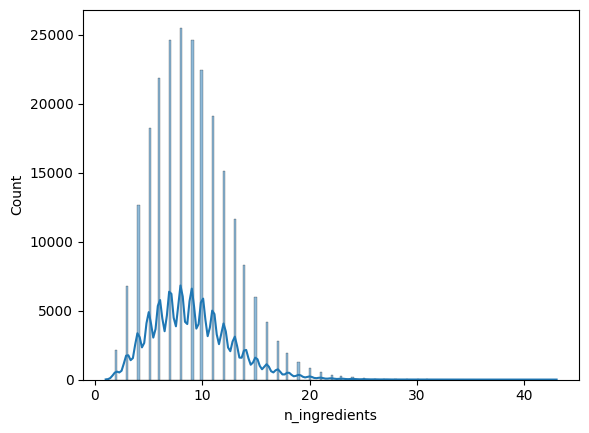

In [195]:
sns.histplot(data_recipes_numeric['n_ingredients'], bins=200,kde = True);
plt.show()

In [196]:
from sklearn.preprocessing import RobustScaler
rb_scaler = RobustScaler()


In [201]:
def numeric_preproc(data):
    data['minutes'] = data['minutes'].clip(lower =5 ,upper=130)
    data.drop(data[data.n_steps == 0].index, inplace=True)
    data['n_steps'] = data['n_steps'].clip(upper=40)
    rb_scaler = RobustScaler()
    data['minutes'] = rb_scaler.fit_transform(data[['minutes']])
    data['calories'] = rb_scaler.fit_transform(data[['calories']])
    data['total_fat_pdv'] = rb_scaler.fit_transform(data[['total_fat_pdv']])
    data['sugar_pdv'] = rb_scaler.fit_transform(data[['sugar_pdv']])
    data['sodium_pdv'] = rb_scaler.fit_transform(data[['sodium_pdv']])
    data['protein_pdv'] = rb_scaler.fit_transform(data[['protein_pdv']])
    data['saturated_fat_pdv'] = rb_scaler.fit_transform(data[['saturated_fat_pdv']])
    data['carbohydrates_pdv'] = rb_scaler.fit_transform(data[['carbohydrates_pdv']])
    return data

numeric_preproc(data=data)


,name,minutes,contributor_id,submitted,tags,n_steps,description,ingredients,n_ingredients,calories,total_fat_pdv,sugar_pdv,sodium_pdv,protein_pdv,saturated_fat_pdv,carbohydrates_pdv,merged_steps,carbohydrates_pdv\t
id,,,,,,,,,,,,,,,,,,
137739,arriba baked winter squash mexican style,0.0,47892,2005-09-16,minute le course main ingredient cuisine prepa...,11,autumn favorite time year cook recipe prepared...,make choice proceed recipe depending size squa...,7,-0.758361,-0.606061,-0.203390,-0.500000,-0.363636,-0.511111,-0.416667,make choice proceed recipe depending size squa...,-0.416667
31490,bit different breakfast pizza,0.0,26278,2002-06-17,minute le course main ingredient cuisine prepa...,9,recipe call crust prebaked bit adding ingredie...,preheat oven degree f press dough bottom side ...,6,-0.405386,-0.060606,-0.423729,0.107143,0.090909,0.266667,-0.666667,preheat oven degree f press dough bottom side ...,-0.666667
112140,kitchen chili,0.0,196586,2005-02-25,course preparation main dish chili crock pot s...,6,modified version mom chili hit christmas party...,brown ground beef large pot add chopped onion ...,13,-0.126249,0.060606,0.118644,1.214286,0.477273,0.088889,-0.333333,brown ground beef large pot add chopped onion ...,-0.333333
59389,alouette potato,0.0,68585,2003-04-14,minute le course main ingredient preparation o...,11,super easy great tasting make ahead side dish ...,place potato large pot lightly salted water br...,11,0.158390,-0.090909,-0.254237,-0.428571,-0.090909,-0.333333,0.916667,place potato large pot lightly salted water br...,0.916667
44061,amish tomato ketchup canning,0.0,41706,2002-10-25,weeknight course main ingredient cuisine prepa...,5,dh amish mother raised recipe much prefers sto...,mix ingredient boil hour thick pour jar use ol...,8,0.114377,-0.575758,5.288136,0.321429,-0.340909,-0.511111,1.583333,mix ingredient boil hour thick pour jar use ol...,1.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486161,zydeco soup,0.0,227978,2012-08-29,ham minute le course main ingredient cuisine p...,7,delicious soup originally found better home ga...,heat oil quart dutch oven add celery onion swe...,22,0.294773,0.181818,0.152542,0.428571,0.590909,-0.044444,0.500000,heat oil quart dutch oven add celery onion swe...,0.500000
493372,zydeco spice mix,0.0,1500678,2013-01-09,minute le course preparation large group condi...,1,spice mix make taste bud dance,mix ingredient together thoroughly,13,-0.864630,-0.606061,-0.389831,1.571429,-0.386364,-0.511111,-0.666667,mix ingredient together thoroughly,-0.666667
308080,zydeco ya ya deviled egg,0.0,37779,2008-06-07,minute le course main ingredient preparation a...,7,deviled egg cajun style,bowl combine mashed yolk mayonnaise stir musta...,8,-0.736065,-0.424242,-0.389831,-0.392857,-0.272727,-0.400000,-0.750000,bowl combine mashed yolk mayonnaise stir musta...,-0.750000


In [198]:
data_2

,name,minutes,contributor_id,submitted,tags,n_steps,description,ingredients,n_ingredients,calories,total_fat_pdv,sugar_pdv,sodium_pdv,protein_pdv,saturated_fat_pdv,carbohydrates_pdv,merged_steps
id,,,,,,,,,,,,,,,,,
137739,arriba baked winter squash mexican style,55,47892,2005-09-16,minute le course main ingredient cuisine prepa...,11,autumn favorite time year cook recipe prepared...,make choice proceed recipe depending size squa...,7,51.5,0.0,13.0,0.0,2.0,0.0,4.0,make choice proceed recipe depending size squa...
31490,bit different breakfast pizza,30,26278,2002-06-17,minute le course main ingredient cuisine prepa...,9,recipe call crust prebaked bit adding ingredie...,preheat oven degree f press dough bottom side ...,6,173.4,18.0,0.0,17.0,22.0,35.0,1.0,preheat oven degree f press dough bottom side ...
112140,kitchen chili,130,196586,2005-02-25,course preparation main dish chili crock pot s...,6,modified version mom chili hit christmas party...,brown ground beef large pot add chopped onion ...,13,269.8,22.0,32.0,48.0,39.0,27.0,5.0,brown ground beef large pot add chopped onion ...
59389,alouette potato,45,68585,2003-04-14,minute le course main ingredient preparation o...,11,super easy great tasting make ahead side dish ...,place potato large pot lightly salted water br...,11,368.1,17.0,10.0,2.0,14.0,8.0,20.0,place potato large pot lightly salted water br...
44061,amish tomato ketchup canning,190,41706,2002-10-25,weeknight course main ingredient cuisine prepa...,5,dh amish mother raised recipe much prefers sto...,mix ingredient boil hour thick pour jar use ol...,8,352.9,1.0,337.0,23.0,3.0,0.0,28.0,mix ingredient boil hour thick pour jar use ol...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486161,zydeco soup,60,227978,2012-08-29,ham minute le course main ingredient cuisine p...,7,delicious soup originally found better home ga...,heat oil quart dutch oven add celery onion swe...,22,415.2,26.0,34.0,26.0,44.0,21.0,15.0,heat oil quart dutch oven add celery onion swe...
493372,zydeco spice mix,5,1500678,2013-01-09,minute le course preparation large group condi...,1,spice mix make taste bud dance,mix ingredient together thoroughly,13,14.8,0.0,2.0,58.0,1.0,0.0,1.0,mix ingredient together thoroughly
308080,zydeco ya ya deviled egg,40,37779,2008-06-07,minute le course main ingredient preparation a...,7,deviled egg cajun style,bowl combine mashed yolk mayonnaise stir musta...,8,59.2,6.0,2.0,3.0,6.0,5.0,0.0,bowl combine mashed yolk mayonnaise stir musta...
